# Ejercicio Final Módulo 3

In [143]:
# Importamos las librerías que necesitamos

# Tratamiento de datos
# ------------------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest,levene, bartlett, mannwhitneyu
import scipy.stats as stats

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

## Fase 1: Exploración y Limpieza

### 1. Exploración Inicial

In [2]:
# Cargamos el primer archivo csv en un DataFrame y visualizamos las primeras 2 filas
df1=pd.read_csv("customer-flight-activity.csv")
df1.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


In [3]:
# Mostramos las últimas 2 filas del DataFrame
df1.tail(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [3]:
# Cargamos el segundo archivo csv en un DataFrame y visualizamos las primeras 2 filas
df2=pd.read_csv("customer-loyalty-history.csv")
df2.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.1,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.6,Standard,2016,3,NaN,NaN


In [5]:
# Mostramos las últimas 2 filas del DataFrame
df2.tail(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.7,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.4,Standard,2015,12,2016.0,8.0


In [ ]:
# Columna en comun: Loyalty Number

In [ ]:
"""
Creamos una función que nos proporcionará las caracteristicas principales de los dos DataFrame:
- la forma
- el nombre de las columnas
- info general
- los tipos de datos
- los nulos
- los duplicados
- las columnas numericas
- las categoricas
- los principales estadisticos
"""

In [219]:
def exploracion_inicial(lista_ficheros):
    for nombre_fichero in lista_ficheros:
        try:
            df = pd.read_csv(nombre_fichero)
            print(f"Exploración general del archivo: {nombre_fichero}\n")
            print("----------------------------------------------------------------\n")
        except:
            print(f"Error en la lectura del archivo {nombre_fichero}")
        # Entendemos la estructura de los datos
        print("------------------Información general----------------------------\n")
        print(df.info())
        print("\n------------------------Forma----------------------------------\n")
        print(f"El Dataframe contiene {df.shape[0]} filas y {df.shape[1]} columnas")
        print("\n------------------------Columnas----------------------------------\n")
        print(df.columns)
        try:
            print("\n------------------Estadistícos columnas numéricas:------------------\n")
            print(df.describe())
        except:
            print(f"El DataFrame del archivo {nombre_fichero} no contiene columnas numericas")
            print("\n--------------------------------------------------------------------\n")
        try:
            print("\n------------------Estadistícos columnas categóricas:-----------------\n")
            print(df.describe(include="O")) # incluimos entre los paréntesis el parámetro include = "object"
        except: 
            print(f"El DataFrame del archivo {nombre_fichero} no contiene columnas categóricas")
            print("\n--------------------------------------------------------------------\n")
        print("\n----------------------Tipo de datos:-------------------------------\n")
        print(df.dtypes)
        print("\n----------------------Cantidad de nulos:---------------------------\n")
        print(df.isnull().sum())
        print("\n----------------------Filas duplicadas:---------------------------\n")
        print(df.duplicated().sum())
        print("\n-----------------------------------------------------------------\n")

In [220]:
# Llamamos a la función que recibirá la lista de los DataFrame que queremos explorar
lista_ficheros = ["customer-flight-activity.csv", "customer-loyalty-history.csv"]
exploracion_inicial(lista_ficheros)

Exploración general del archivo: customer-flight-activity.csv

----------------------------------------------------------------

------------------Información general----------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non

### Exploración de las columnas claves

#### Analizamos las columnas clave

- Conocer los valores únicos 
- Conocer la frequencia de valores únicos
- Cantidad de nulos --> Gestión de nulos --> porcentaje de nulos para cada columna
- Cantidad de duplicados --> eliminar duplicados

### Consideraciones tras la exploración inicial:
- En el primer dataframe no tenemos nulos y no tenemos columnas categoricas. Tenemos filas duplicadas ---> eliminar
- En el segundo DataFrame tenemos nulos en 3 columnas numericas, 'Salary', 'Cancellation Year', 'Cancellation Month'(tipo=float)
- Podemos utilizar  modelos estadisticos, la moda, la mediana o la media para reemplazar los nulos, utilizando la clase SimpleImputer o el      fillna de Pandas o podemos utilizar IterativeImputer o KnnImputer
- En el segundo DataFrame no tenemos filas duplicadas
- La columna salary tiene valores negativos
- No tenemos variables categoricas para analizar

In [ ]:
# Columna en comun: Loyalty Number
# Columnas clave: Total Flights, Distance, Points Accumulated, Country, Province, Education, Salary, Loyalty Card, Gender, Marital Status 

In [ ]:
# Analizar la columna Loyalty Number de los 2 DataFrame
# Year
# Month
# Flights booked (vuelos reservados)
# Flights with companions (vuelos en los cuales se ha reservado más de un asiento)
# Total flights (numero total de vuelos tomados sin importar si el cliente ha viajado solo o con acompañante)
# Distance
# Points Accumulated
# Country
# Province
# Gender
# Education
# Salary
# Marital Status
# Loyalty Card
# Cancellation Year, Cancellation Month ---> cambiar tipo de dato

In [39]:
# Obtenemos una muestra del primer DataFrame
df1.sample()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
20435,289151,2017,2,6,0,6,1332,133.0,0,0


In [40]:
# Obtenemos una muestra del segundo DataFrame
df2.sample()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
8900,642976,Canada,Ontario,Sudbury,M5V 1G5,Male,Bachelor,53620.0,Single,Nova,3491.3,2018 Promotion,2018,2,NaN,NaN


In [73]:
# Exploro las columnas clave de los dos DataFrame

columnas_clave1 = ["Loyalty Number", "Year", "Month", "Flights Booked", "Flights with Companions", "Total Flights", "Distance", "Points Accumulated"]
columnas_clave2 = ["Loyalty Number", "Country", "Province", "Gender", "Education", "Salary", "Marital Status", "Loyalty Card", "Cancellation Year", "Cancellation Month"]

# selecciono las columnas en cada DataFrame

df1_columnas_clave = df1[columnas_clave1]
df2_columnas_clave = df2[columnas_clave2]


In [74]:
# Analizamos las columnas clave del primer DataFrame

for columna in df1_columnas_clave:
    print(f"Analizamos la columna: {columna.upper()}\n")
    print(f"Los valores únicos de la columna son: {df1_columnas_clave[columna].unique()}\n")
    print(f"La frequencia de los valores únicos es: \n{df1_columnas_clave[columna].value_counts()}\n")
    print(f"La cantidad de valores nulos es: {df1_columnas_clave[columna].isnull().sum()}\n")
    print(f"La cantidad de duplicados en la columna es: {df1_columnas_clave.duplicated(subset=[columna]).sum()}")
    print("--------------------------------------------------")  

Analizamos la columna: LOYALTY NUMBER

Los valores únicos de la columna son: [100018 100102 100140 ... 999731 999788 999891]

La frequencia de los valores únicos es: 
678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: Loyalty Number, Length: 16737, dtype: int64

La cantidad de valores nulos es: 0

La cantidad de duplicados en la columna es: 388887
--------------------------------------------------
Analizamos la columna: YEAR

Los valores únicos de la columna son: [2017 2018]

La frequencia de los valores únicos es: 
2017    202812
2018    202812
Name: Year, dtype: int64

La cantidad de valores nulos es: 0

La cantidad de duplicados en la columna es: 405622
--------------------------------------------------
Analizamos la columna: MONTH

Los valores únicos de la columna son: [ 1  9  2  3 11  4  5  7  6  8 10 12]

La frequencia de los valores únicos es: 
1     33802
9     33802
2     33802
3 

In [61]:
# Analizamos las columnas clave del segundo DataFrame

for columna in df2_columnas_clave:
    print(f"Analizamos la columna: {columna.upper()}\n")
    print(f"Los valores únicos de la columna son: {df2_columnas_clave[columna].unique()}\n")
    print(f"La frequencia de los valores únicos es: \n{df2_columnas_clave[columna].value_counts()}\n")
    print(f"La cantidad de valores nulos es: {df2_columnas_clave[columna].isnull().sum()}\n")
    print(f"La cantidad de duplicados en la columna es: {df2_columnas_clave.duplicated(subset=[columna]).sum()}")
    print("--------------------------------------------------") 

Analizamos la columna: LOYALTY NUMBER

Los valores únicos de la columna son: [480934 549612 429460 ... 776187 906428 652627]

La frequencia de los valores únicos es: 
480934    1
208485    1
455896    1
469781    1
533488    1
         ..
922188    1
780529    1
721438    1
761015    1
652627    1
Name: Loyalty Number, Length: 16737, dtype: int64

La cantidad de valores nulos es: 0

La cantidad de duplicados en la columna es: 0
--------------------------------------------------
Analizamos la columna: COUNTRY

Los valores únicos de la columna son: ['Canada']

La frequencia de los valores únicos es: 
Canada    16737
Name: Country, dtype: int64

La cantidad de valores nulos es: 0

La cantidad de duplicados en la columna es: 16736
--------------------------------------------------
Analizamos la columna: PROVINCE

Los valores únicos de la columna son: ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edw

In [ ]:
# En la columna "Country" hay un solo valor único: 'Canada'

In [63]:
# Obtenemos la lista de las columnas numericas que tienen nulos

nulos_num = df2_columnas_clave[df2_columnas_clave.columns[df2_columnas_clave.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['Salary', 'Cancellation Year', 'Cancellation Month'], dtype='object')


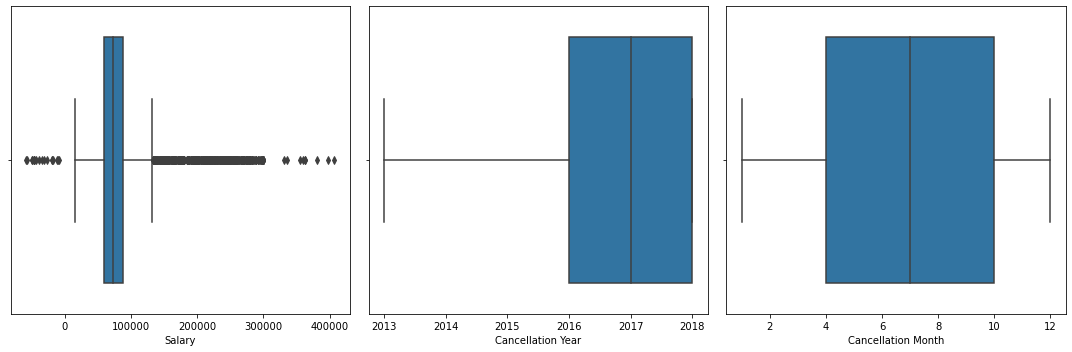

In [18]:
# Comprobamos, mediante visualización, si en las columnas donde hay nulos, tenemos valores atípicos

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

sns.boxplot(data=df2_columnas_clave, x=nulos_num[0], ax=axes[0])
sns.boxplot(data=df2_columnas_clave, x=nulos_num[1], ax=axes[1])
sns.boxplot(data=df2_columnas_clave, x=nulos_num[2], ax=axes[2])

plt.tight_layout()
plt.show();

In [ ]:
# Vemos que en la columna salary tenemos valores atípicos (outliers) 

In [5]:
# Eliminamos ls filas duplicadas en el primer DataFrame.

print(f"El Dataframe contiene {df1.shape[0]} filas y {df1.shape[1]} columnas")
df1.duplicated().sum()
print(f"El Dataframe contiene {df1.duplicated().sum()} filas duplicadas")
# Asignamos una nueva variable al dataframe sin duplicados y comprobamos que los duplicados se hayan eliminado correctamente
df1_sin_duplicados=df1.drop_duplicates()
print("Eliminamos los duplicados")
df1_sin_duplicados.duplicated().sum()
print(f"El Dataframe contiene {df1_sin_duplicados.duplicated().sum()} filas duplicadas")
print(f"El Dataframe ahora contiene {df1_sin_duplicados.shape[0]} filas y {df1_sin_duplicados.shape[1]} columnas")

El Dataframe contiene 405624 filas y 10 columnas
El Dataframe contiene 1864 filas duplicadas
Eliminamos los duplicados
El Dataframe contiene 0 filas duplicadas
El Dataframe ahora contiene 403760 filas y 10 columnas


### Unión

In [6]:
# Unimos los conjuntos de datos. La columna de unión es "Loyalty Number". 
# Utilizamos el Merge para unir los dos DataFrame en función de la columna en común.

df_mergeado = pd.merge(left=df1_sin_duplicados, right=df2, how="left", on="Loyalty Number")

In [7]:
# Mostramos el numero de filas y de columnas del DataFrame tras la unión

df_mergeado.shape

(403760, 25)

In [123]:
# Obtenemos una muestra de tres filas aleatorias

df_mergeado.sample(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
319658,105700,2018,8,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,College,NaN,Single,Nova,7945.0,Standard,2013,8,2015.0,8.0
202462,137383,2018,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,72615.0,Single,Star,9775.8,Standard,2014,7,2015.0,3.0
359826,453654,2018,10,4,3,7,1484,148.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Female,Bachelor,92067.0,Married,Nova,4273.6,Standard,2014,1,NaN,NaN


##  Limpieza de Datos

In [8]:
# Cambiamos el formato de los nombres de las columnas a minúsculas y sustituimos los espacios por "_" usando una list comprehension

df_mergeado.columns=[column.lower().replace(" ", "_") for column in df_mergeado.columns]  

In [9]:
# Mostramos las primeras 2 filas del DataFrame para comprobar el cambio en el nombre de las columnas

df_mergeado.head(2)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.7,Standard,2013,3,NaN,NaN


In [10]:
# Obtenemos el nombre de las columnas
df_mergeado.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')

In [11]:
# cambiar el nombre de la columna clv ("customer_lifetime_value").

df_mergeado=df_mergeado.rename(columns={"clv":"customer_lifetime_value"})

# ordenar las columnas

columnas_ordenadas = ['loyalty_number', 'year', 'month', 'flights_booked','flights_with_companions', 'total_flights', 'distance',
                      'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed','country', 'province', 'city', 'postal_code',
                      'salary','education', 'loyalty_card', 'marital_status', 'gender', 'customer_lifetime_value', 'enrollment_type','enrollment_year',
                      'enrollment_month', 'cancellation_year','cancellation_month']

df_mergeado=df_mergeado[columnas_ordenadas]

df_mergeado.sample(3) # Mostramos 3 filas aleatorias del DataFrame 

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,salary,education,loyalty_card,marital_status,gender,customer_lifetime_value,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
304990,221993,2018,7,20,0,20,2640,264.0,0,0,Canada,Alberta,Calgary,T3E 2V9,83570.0,Bachelor,Star,Married,Female,9416.9,Standard,2017,7,NaN,NaN
312667,794348,2017,3,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,NaN,College,Star,Single,Male,4755.5,Standard,2017,1,2017.0,9.0
55552,790450,2018,2,11,2,13,2522,378.0,297,24,Canada,Ontario,Toronto,P5S 6R4,67497.0,Bachelor,Aurora,Married,Female,6470.5,Standard,2014,1,NaN,NaN


### Exploramos los nulos y el tipo de datos

In [128]:
# Mostramos la información sobre el DataFrame
df_mergeado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               403760 non-null  int64  
 1   year                         403760 non-null  int64  
 2   month                        403760 non-null  int64  
 3   flights_booked               403760 non-null  int64  
 4   flights_with_companions      403760 non-null  int64  
 5   total_flights                403760 non-null  int64  
 6   distance                     403760 non-null  int64  
 7   points_accumulated           403760 non-null  float64
 8   points_redeemed              403760 non-null  int64  
 9   dollar_cost_points_redeemed  403760 non-null  int64  
 10  country                      403760 non-null  object 
 11  province                     403760 non-null  object 
 12  city                         403760 non-null  object 
 13 

In [129]:
# Obtenemos las columnas numericas con nulos y el porcentaje de nulos de cada una, dividendo el conteo de valores nulos por el numero total de filas y multiplicando el resultado por 100 

nulos_num = df_mergeado[df_mergeado.columns[df_mergeado.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_num)
    
print("El porcentaje de nulos de cada una de las columnas anteriores es: \n")
print(df_mergeado[nulos_num].isnull().sum() / df_mergeado.shape[0]*100)

Las columnas numéricas que tienen nulos son : 
 
Index(['salary', 'cancellation_year', 'cancellation_month'], dtype='object')
El porcentaje de nulos de cada una de las anteriores es: 

salary               25.3
cancellation_year    87.7
cancellation_month   87.7
dtype: float64


In [130]:
# lo convertimos a DataFrame

porc_nulos=df_mergeado[nulos_num].isnull().sum() / df_mergeado.shape[0]*100

df_nulos=pd.DataFrame(porc_nulos, columns = ["%_nulos"])

df_nulos

,%_nulos
salary,25.3
cancellation_year,87.7
cancellation_month,87.7


In [132]:
# Mostramos los valores únicos de la columna cancellation_year
df_mergeado["cancellation_year"].unique()

array([  nan, 2018., 2015., 2016., 2014., 2013., 2017.])

In [133]:
# Mostramos los valores únicos de la columna cancellation_month
df_mergeado["cancellation_month"].unique()

array([nan,  3.,  9.,  2.,  7.,  6.,  8.,  4.,  1.,  5., 11., 12., 10.])

In [139]:
# Volvemos a verificar si hay valores nulos en la columna cancellation_year. Los valores nulos se representan como True, mientras que los valores no nulos se representan como False. 
df_mergeado["cancellation_year"].isna()

0         True
1         True
2         True
3         True
4         True
          ... 
403755    True
403756    True
403757    True
403758    True
403759    True
Name: cancellation_year, Length: 403760, dtype: bool

In [183]:
# Una vez que Nan en Pandas se considera con float y no es posible covertirlo a int, utilizamos para la conversión el dtype='Int64' de Pandas

df_mergeado["cancellation_year"]=df_mergeado["cancellation_year"].astype(dtype='Int64')

In [184]:
# Hacemos lo mismo con la columnas "cancelation_month"

df_mergeado["cancellation_month"]=df_mergeado["cancellation_month"].astype('Int64')

In [147]:
# Mostramos los valores únicos de la columna cancellation_month y comprobamos el cambio de formato
df_mergeado["cancellation_month"].unique()

<IntegerArray>
[<NA>, 3, 9, 2, 7, 6, 8, 4, 1, 5, 11, 12, 10]
Length: 13, dtype: Int64

In [ ]:
'''
Estas columnas puede que tengan un alto porcentaje de nulos porque el cliente sigue siendo cliente y no ha cancelado.
Reemplazamos los valores nulos de las columnas cancellation_month y cancellation_year utilizando el metodo .fillna() con -1.
Este valor actuará como "marcador" de nulos.
'''

In [186]:
df_mergeado["cancellation_month"]=df_mergeado["cancellation_month"].fillna(-1)

In [187]:
df_mergeado["cancellation_year"]=df_mergeado["cancellation_year"].fillna(-1)

In [188]:
df_mergeado.sample(2)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,salary,education,loyalty_card,marital_status,gender,customer_lifetime_value,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
305437,775562,2018,10,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M2P 4F6,70226.0,Bachelor,Star,Married,Male,3208.2,Standard,2015,3,2017,4
185604,136049,2017,12,0,0,0,0,0.0,0,0,Canada,Ontario,Trenton,K8V 4B2,60917.0,Bachelor,Nova,Married,Female,2769.7,Standard,2018,5,-1,-1


In [189]:
# Utilizamos info() y comprobamos que en las columnas cancellation_month y cancellation_year no quedan nulos después del reemplazo
df_mergeado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               403760 non-null  int64  
 1   year                         403760 non-null  int64  
 2   month                        403760 non-null  int64  
 3   flights_booked               403760 non-null  int64  
 4   flights_with_companions      403760 non-null  int64  
 5   total_flights                403760 non-null  int64  
 6   distance                     403760 non-null  int64  
 7   points_accumulated           403760 non-null  float64
 8   points_redeemed              403760 non-null  int64  
 9   dollar_cost_points_redeemed  403760 non-null  int64  
 10  country                      403760 non-null  object 
 11  province                     403760 non-null  object 
 12  city                         403760 non-null  object 
 13 

In [13]:
# Tras la exporacion inicial, vimos que en la columna salary teniamos valores negativos. Obtenemos los registros de la columna salario con valores negativos. 

df_mergeado[df_mergeado["salary"]<0]

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,salary,education,loyalty_card,marital_status,gender,customer_lifetime_value,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
291,115505,2017,1,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,-10605.0,Bachelor,Nova,Married,Male,5860.2,2018 Promotion,2018,4,NaN,NaN
956,152016,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,-58486.0,Bachelor,Aurora,Married,Female,5067.2,2018 Promotion,2018,2,NaN,NaN
1716,194065,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Sudbury,M5V 1G5,-31911.0,Bachelor,Nova,Married,Female,2888.8,2018 Promotion,2018,2,NaN,NaN
2081,212128,2017,1,3,0,3,1959,195.0,0,0,Canada,Ontario,Toronto,P2T 6G3,-49001.0,Bachelor,Nova,Married,Male,3130.7,2018 Promotion,2018,2,NaN,NaN
2433,232755,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V1E 4R6,-46683.0,Bachelor,Nova,Single,Female,4787.8,2018 Promotion,2018,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398813,734647,2018,12,15,0,15,1440,144.0,0,0,Canada,Saskatchewan,Regina,S1J 3C5,-46303.0,Bachelor,Nova,Married,Male,11280.7,2018 Promotion,2018,4,NaN,NaN
399884,790475,2018,12,7,1,8,1056,105.0,0,0,Canada,Ontario,Trenton,K8V 4B2,-34079.0,Bachelor,Nova,Married,Female,12913.5,2018 Promotion,2018,2,NaN,NaN
402017,906428,2018,12,13,0,13,2912,291.0,0,0,Canada,Yukon,Whitehorse,Y2K 6R0,-57297.0,Bachelor,Star,Married,Male,10018.7,2018 Promotion,2018,4,NaN,NaN
402459,430398,2018,12,5,5,10,660,66.0,539,44,Canada,Newfoundland,St. John's,A1C 6H9,-17534.0,Bachelor,Nova,Married,Male,49423.8,2018 Promotion,2018,3,NaN,NaN


In [14]:
# Reemplazamos los valores negativos por np.nan, aplicando a la columna salary una función lambda

df_mergeado["salary"]=df_mergeado["salary"].apply(lambda x:np.nan if x < 0 else x)

In [21]:
# Obtenemos el porcentaje de nulos la columna, dividendo el conteo de valores nulos por el numero total de filas y multiplicando el resultado por 100 

round((df_mergeado["salary"].isnull().sum()/df_mergeado.shape[0]*100),2)

25.45

In [22]:
# En el anterior info, en la columna salary teniamos 301500 non-null, comprobamos que ahora la cantidad de no nulos haya cambiado
df_mergeado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               403760 non-null  int64  
 1   year                         403760 non-null  int64  
 2   month                        403760 non-null  int64  
 3   flights_booked               403760 non-null  int64  
 4   flights_with_companions      403760 non-null  int64  
 5   total_flights                403760 non-null  int64  
 6   distance                     403760 non-null  int64  
 7   points_accumulated           403760 non-null  float64
 8   points_redeemed              403760 non-null  int64  
 9   dollar_cost_points_redeemed  403760 non-null  int64  
 10  country                      403760 non-null  object 
 11  province                     403760 non-null  object 
 12  city                         403760 non-null  object 
 13 

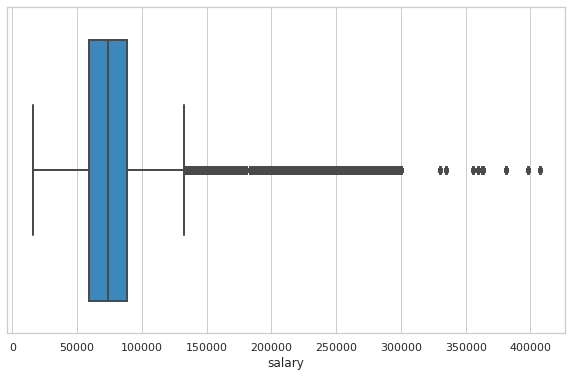

In [83]:
# Graficamos la columna y comprobamos que no hay más valores negativos en la columna salary
plt.subplots(figsize = (10,6))
sns.boxplot(data=df_mergeado, x="salary");

In [23]:
# Comparamos la media y la mediana de la columna salary
df_mergeado["salary"].describe()[["mean", "50%"]]

mean   79441.6
50%    73523.0
Name: salary, dtype: float64

In [ ]:
"""
Tras reemplazar los valores negativos, sabiendo que estamos analizando los salarios de los clientes y viendo que la columna salary
tiene valores atípicos optamos por reemplazar los nulos con métodos estadisticos avanzado (IterativeImputer y KNNImputer).
Aplicaremos ambos métodos a la columna salary para luego compararlos.
"""

In [29]:
# Creamos una copia del DataFrame, ya que vamos a crear nuevas columnas  
df_merg_copia=df_mergeado.copy()

In [177]:
df_merg_copia.head(3)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,salary,education,loyalty_card,marital_status,gender,customer_lifetime_value,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,92552.0,Bachelor,Aurora,Married,Female,7919.2,Standard,2016,8,-1,-1
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,NaN,College,Nova,Single,Male,2887.7,Standard,2013,3,-1,-1
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,NaN,College,Nova,Divorced,Female,2838.1,Standard,2016,7,-1,-1


In [30]:
# Aplicamos el método IterativeImputer a la columna  salary y predeciremos los valores faltantes utilizando información de las otras columnas presentes en el conjunto de datos.

# Creamos el imputador y establecemos 5 como número de iteraciones que el imputador utiza para ajustar los valores faltantes.
imputer = IterativeImputer(max_iter = 5, random_state = 42)

# Ajustamos y transformamos los datos de la columna salary
salario_imputado = imputer.fit_transform(df_merg_copia[['salary']])

salario_imputado

array([[92552.        ],
       [79441.62882865],
       [79441.62882865],
       ...,
       [47670.        ],
       [79441.62882865],
       [46594.        ]])

In [31]:
# Añadimos el array al DataFrame 
df_merg_copia[['salary_iterative']]=salario_imputado
# Comprobamos los nulos
print(f"Después del 'Iterative Imputer' tenemos: \n{df_merg_copia[['salary_iterative']].isnull().sum()} nulos")

Después del 'Iterative Imputer' tenemos: 
salary_iterative    0
dtype: int64 nulos


In [248]:
# Aplicamos el método KNNImputer para predecir los valores faltantes según los valores vecinos
# Instanciamos la clase del KNNImputer
imputer_knn = KNNImputer(n_neighbors = 5)
# Ajustamos y transformamos los datos de la columna salary
imputer_knn_imputado = imputer_knn.fit_transform(df_merg_copia[["salary"]])
imputer_knn_imputado

array([[92552.        ],
       [79441.62882865],
       [79441.62882865],
       ...,
       [47670.        ],
       [79441.62882865],
       [46594.        ]])

In [249]:
# Añadimos el array al DataFrame 
df_merg_copia[['salary_knn']] = imputer_knn_imputado
# Comprobamos los nulos, tras la imputación 
print(f"Después del 'KNN' tenemos: \n{df_merg_copia[['salary_knn']].isnull().sum()} nulos")

Después del 'KNN' tenemos: 
salary_knn    0
dtype: int64 nulos


In [253]:
# Comparamos cual de los dos métodos se ajusta mejor a los datos de la columna salary. Utilizamos el describe() para ver los estadisticos antes y despues de la inputación.
df_merg_copia.describe()[['salary','salary_iterative','salary_knn']]

,salary,salary_iterative,salary_knn
count,301020.0,403760.0,403760.0
mean,79441.6,79441.6,79441.6
std,34704.3,29965.4,29965.4
min,15609.0,15609.0,15609.0
25%,59278.0,64001.0,64001.0
50%,73523.0,79441.6,79441.6
75%,88626.0,82940.0,82940.0
max,407228.0,407228.0,407228.0


In [32]:
# Obtenemos los mismos resultados, decidimos quedarnos con el metodo IterativeImputer. Eliminamos la columna 'salary'

df_merg_copia.drop(['salary'], axis=1, inplace=True)

# Cambiamos el nombre de la columna 'salary_iterative' a 'salary' para que tenga el mismo nombre de la columna de origen

columna_nombre_salario = {"salary_iterative":"salary"}

df_merg_copia.rename(columns=columna_nombre_salario, inplace=True)

In [33]:
# Mostramos el nombre de las columnas
df_merg_copia.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'education',
       'loyalty_card', 'marital_status', 'gender', 'customer_lifetime_value',
       'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month', 'salary'],
      dtype='object')

In [34]:
# Guardamos el DataFrame limpio
df_merg_copia.to_csv("customer_flight_loyalty_no_null.csv")

#  Fase 2: Visualización


In [35]:
# Cargamos el DataFrame limpio

df = pd.read_csv("customer_flight_loyalty_no_null.csv", index_col=0)
df.head(3)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,education,loyalty_card,marital_status,gender,customer_lifetime_value,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,salary
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Bachelor,Aurora,Married,Female,7919.2,Standard,2016,8,NaN,NaN,92552.0
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,College,Nova,Single,Male,2887.7,Standard,2013,3,NaN,NaN,79441.6
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,College,Nova,Divorced,Female,2838.1,Standard,2016,7,NaN,NaN,79441.6


In [234]:
# 3. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

# Para contestar a la pregunta, obtenemos los datos del año 2017

data_2017 = df[df["year"]==2017]

# Ahora necesitamos obtener la cantidad de vuelos reservados por mes en el año 2017

vuelos_reservados_por_mes=data_2017.groupby("month")["flights_booked"].sum().reset_index()

vuelos_reservados_por_mes

,month,flights_booked
0,1,47766
1,2,47691
2,3,64271
3,4,55720
4,5,65279
5,6,80493
6,7,89288
7,8,78692
8,9,63304
9,10,60351


In [236]:
# Ahora obtenemos los datos del año 2018

data_2018 = df[df["year"]==2018]

vuelos_reservados_por_mes2=data_2018.groupby("month")["flights_booked"].sum().reset_index()

vuelos_reservados_por_mes2

,month,flights_booked
0,1,49170
1,2,48643
2,3,66928
3,4,56791
4,5,76891
5,6,92749
6,7,104143
7,8,90512
8,9,73075
9,10,69110


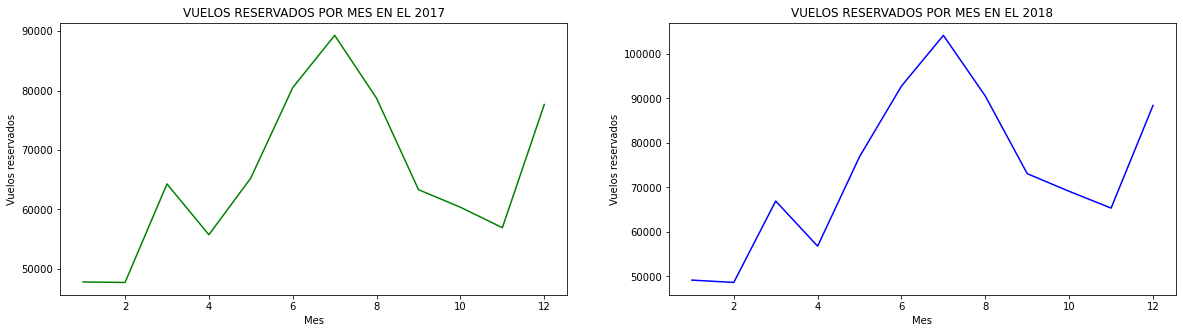

In [237]:
# Utilizamos un gráfico de linea para mostrar las tendencias a lo largo del tiempo 

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

sns.lineplot(data=vuelos_reservados_por_mes, 
             x='month', 
             y='flights_booked',
             color="g",
             ax=axes[0])

# Ponemos título a la grafica y a los ejes
axes[0].set_title('VUELOS RESERVADOS POR MES EN EL 2017', fontsize=12)
axes[0].set_xlabel('Mes', fontsize=10)
axes[0].set_ylabel('Vuelos reservados', fontsize=10);

sns.lineplot(data=vuelos_reservados_por_mes2,
             x='month', 
             y='flights_booked',
             color="b",
             ax=axes[1])

# Ponemos título a la grafica y a los ejes
axes[1].set_title('VUELOS RESERVADOS POR MES EN EL 2018', fontsize=12)
axes[1].set_xlabel('Mes', fontsize=10)
axes[1].set_ylabel('Vuelos reservados', fontsize=10);

In [ ]:
# El grafico nos muestra que en ambos años hay un pico en la cantidad de vuelos durante la epoca de verano y de Navidad

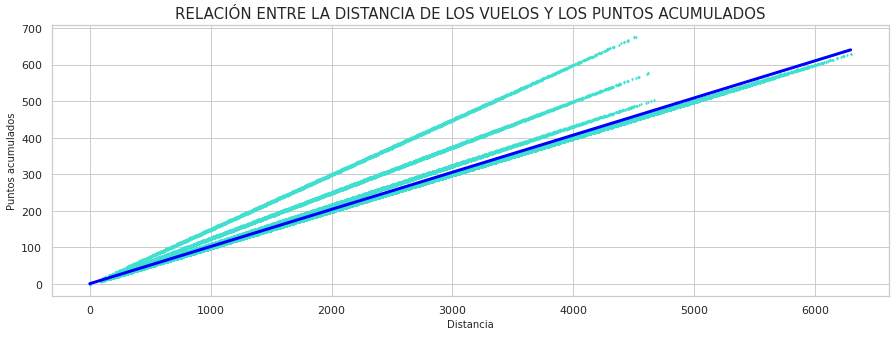

In [173]:
# 4. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

# En este caso, para evaluar la relación que existe entre las dos variables numericas, utilizaremos un gráfico de regresión o regplot.
# Utilizamos seaborn, ya que no tenemos el método en matplotlib 

plt.figure(figsize=(15,5))
sns.regplot(data=df,
            x="distance",
            y="points_accumulated",
            marker = "d",
            line_kws = {"color": "blue", "linewidth": 3},
            scatter_kws = {"color": "turquoise", "s": 3})

# ponemos título a la gráfica
plt.title("RELACIÓN ENTRE LA DISTANCIA DE LOS VUELOS Y LOS PUNTOS ACUMULADOS", fontsize = 15)

# cambiamos los nombres de los ejes
plt.xlabel("Distancia", fontsize = 10)
plt.ylabel("Puntos acumulados", fontsize = 10);

In [ ]:
# El grafico nos muestra que existe una relación lineal positiva entre las dos variables

In [76]:
# 5. ¿Cuál es la distribución de los clientes por provincia o estado?

# Utilizaremos los datos de la provincia, ya que en la columna "estado" solo tenemos Canada.

df_clientes_provincia = df['province'].value_counts().reset_index()

df_clientes_provincia=df_clientes_provincia.rename(columns={"index":"provincia", "province":"cantidad"})
df_clientes_provincia

,provincia,cantidad
0,Ontario,130258
1,British Columbia,106442
2,Quebec,79573
3,Alberta,23360
4,Manitoba,15900
5,New Brunswick,15352
6,Nova Scotia,12507
7,Saskatchewan,9861
8,Newfoundland,6244
9,Yukon,2679


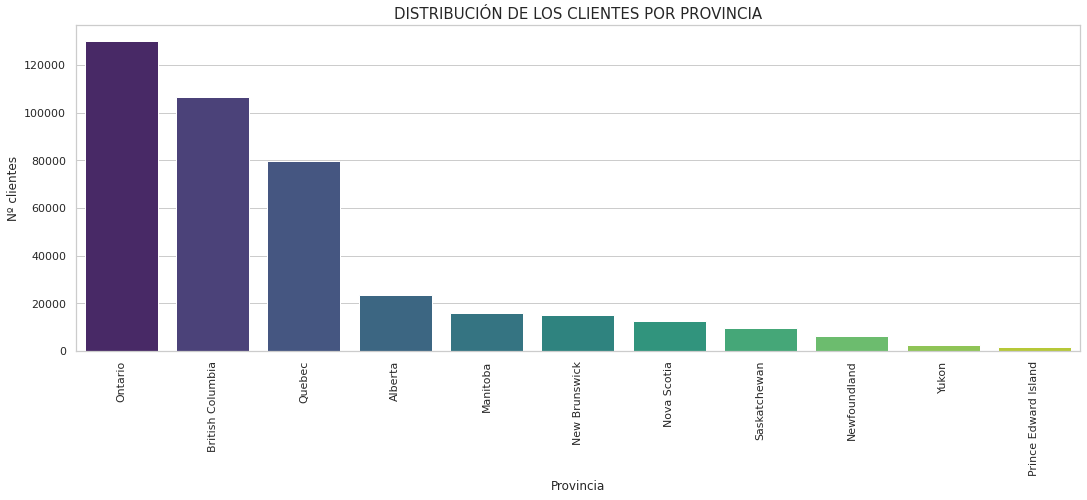

In [195]:
# Utilizamos un Barplot para representar la cantidad de los clientes por provincia. Utilizamos la libreria Seaborn

plt.figure(figsize=(18,6))
sns.barplot(data=df_clientes_provincia,
            x="provincia",
            y="cantidad",
            palette="viridis")
plt.xticks(rotation = 90)
plt.xlabel("Provincia")
plt.ylabel("Nº clientes")

plt.title("DISTRIBUCIÓN DE LOS CLIENTES POR PROVINCIA", fontsize = 15);

In [74]:
# 6. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
# Utilizaremos Matplotlib para realizar el grafuco. En este caso, tenemos que hacer el calculo previo del promedio del salario para cada una de las categorias.

df_salario_educacion = df.groupby("education")["salary"].mean().reset_index()
df_salario_educacion

,education,salary
0,Bachelor,72679.7
1,College,79441.6
2,Doctor,178403.7
3,High School or Below,61184.0
4,Master,103734.5


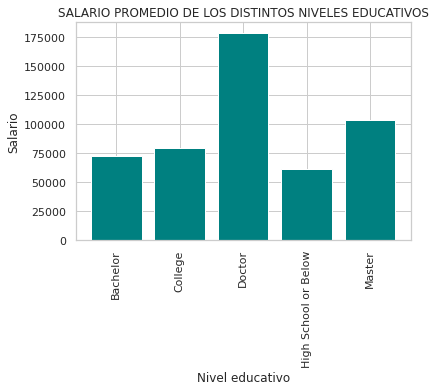

In [181]:
# Visualizar el salario promedio entre los distintos niveles educativos de los clientes, mediante un Barplot, utilizando Matplotlib

plt.bar(x = "education", 
        height = "salary", 
        data = df_salario_educacion,
        color = "teal")

plt.xticks(rotation = 90)
plt.xlabel("Nivel educativo")
plt.ylabel("Salario")
plt.title('SALARIO PROMEDIO DE LOS DISTINTOS NIVELES EDUCATIVOS', fontsize = 12);

In [71]:
# 7. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

df_tarjetas_fidelidad=df["loyalty_card"].value_counts().reset_index()

df_tarjetas_fidelidad=df_tarjetas_fidelidad.rename(columns={"index":"tarjeta_fidelidad", "loyalty_card":"%"})

df_tarjetas_fidelidad


,tarjeta_fidelidad,%
0,Star,183745
1,Nova,136883
2,Aurora,83132


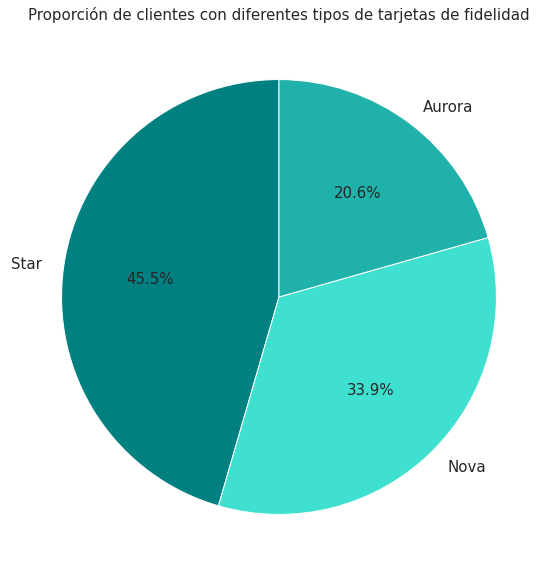

In [163]:
# Creamos el gráfico. En este caso, para visualizar la proporción de clientes según los tipos de tarjetas de fidelidad, utilizaremos un pieplot o gráfico de tartas

colores = ["teal", "turquoise", "lightseagreen"]

plt.figure(figsize=(10, 10))
plt.pie("%", labels= "tarjeta_fidelidad",
        data = df_tarjetas_fidelidad, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 15}, 
        startangle=90);

plt.title('Proporción de clientes con diferentes tipos de tarjetas de fidelidad', fontsize = 15);

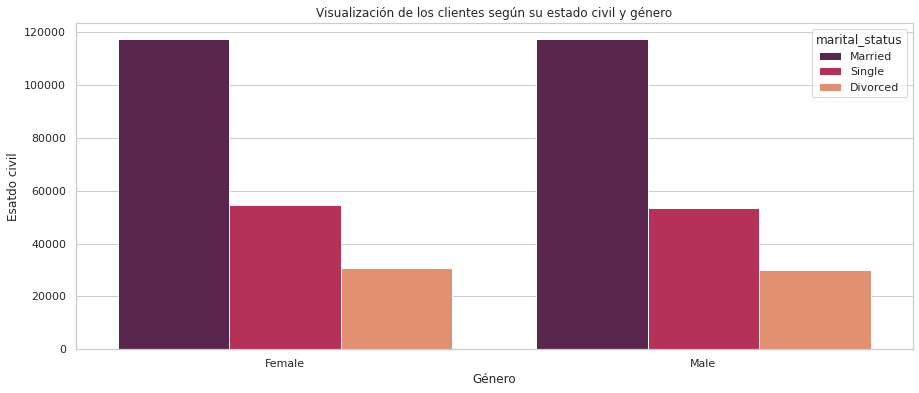

In [167]:
#8. ¿Cómo se distribuyen los clientes según su estado civil y género? 

plt.figure(figsize = (15, 6))
sns.countplot(x="gender",
              hue="marital_status",
              data=df,
              palette="rocket")

plt.title('Visualización de los clientes según su estado civil y género', fontsize = 12)
plt.xlabel("Género")
plt.ylabel("Esatdo civil");

## Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

### Objectivo: Existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes?
### Preparación de datos:
 - Filtramos el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'
 - Definición de las hipótesis:
 
Hipótesis nula (H0): No hay diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

Hipótesis alternativa (H1): Existe una diferencia significativa en en el número de vuelos reservados entre los diferentes niveles educativos.

In [52]:
df_nuevo=df[["flights_booked","education"]]
df_nuevo.sample(3)

,flights_booked,education
129045,13,Bachelor
242834,13,High School or Below
35425,15,College


In [53]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 403759
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   flights_booked  403760 non-null  int64 
 1   education       403760 non-null  object
dtypes: int64(1), object(1)
memory usage: 25.4+ MB


### Análisis Descriptivo

- Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.


In [96]:
# Obtengo el numero total de vuelos por nivel de educación

df_vuelos_educacion=df_nuevo.groupby("education")["flights_booked"].sum().reset_index()
df_vuelos_educacion

,education,flights_booked
0,Bachelor,1038123
1,College,426398
2,Doctor,74036
3,High School or Below,78993
4,Master,51614


In [98]:
# Obtenemos el numero de clientes por nivel de educación

df_nuevo["education"].value_counts()

Bachelor                252567
College                 102260
High School or Below     18915
Doctor                   17731
Master                   12287
Name: education, dtype: int64

In [109]:
# Mostramos los principales estadisticos del numero de vuelos reservados para cada grupo

df_nuevo.groupby("education")["flights_booked"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,252567.0,4.1,5.2,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.2,5.2,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.2,5.3,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.2,5.2,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.2,5.2,0.0,0.0,1.0,8.0,21.0


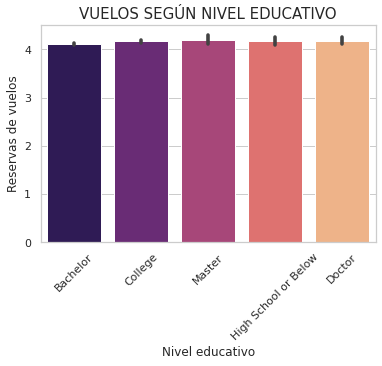

In [194]:
# Visualizamos los datos antes de realizar la prueba

sns.barplot(x = 'education', y = 'flights_booked',
            data = df_nuevo,
            palette = 'magma')

plt.title('VUELOS SEGÚN NIVEL EDUCATIVO', fontsize=15)
plt.xlabel('Nivel educativo')
plt.xticks(rotation = 45)
plt.ylabel('Reservas de vuelos');

### Prueba estadística

Primera prueba. Tenemos 5 grupos según el nivel educativo, podríamos realizar el Análisis de Varianza (ANOVA). Para realizarlo tenemos que evaluar si se cumplen los supuestos de: 

- Normalidad en cada grupo, para verificar si los datos siguen una distribución normal

- Homogeneidad de varianzas entre grupos

In [103]:
# Filtramos los datos para obtener 5 grupos según el nivel educativo

grupo_bachelor = df_nuevo[df_nuevo['education']== 'Bachelor']['flights_booked']
grupo_college = df_nuevo[df_nuevo['education']== 'College']['flights_booked']
grupo_doctor = df_nuevo[df_nuevo['education']== 'Doctor']['flights_booked']
grupo_highschool_below = df_nuevo[df_nuevo['education']== 'High School or Below']['flights_booked']
grupo_master = df_nuevo[df_nuevo['education']== 'Master']['flights_booked']

In [110]:
lista_de_grupos=[grupo_bachelor, grupo_college, grupo_doctor, grupo_highschool_below, grupo_master]

In [115]:
# Realizamos la prueba de normalidad (usando la prueba de Kolmogorov)

def k_normalidad (lista_de_grupos):
    alpha = 0.05
    for grupo in lista_de_grupos:
        p_value_k=kstest(grupo, "norm").pvalue
        if p_value_k > alpha:
            print("Asumimos la distribucion como normal de los datos")
        else:
            print("Asumimos que la distribucion no es normal")

In [116]:
k_normalidad(lista_de_grupos)

Asumimos que la distribucion no es normal
Asumimos que la distribucion no es normal
Asumimos que la distribucion no es normal
Asumimos que la distribucion no es normal
Asumimos que la distribucion no es normal


In [ ]:
# Utilizamos Levene para verificar la homogeneidad entre varianzas

In [117]:
def homogeneidad (lista_de_grupos):
    statistic, p_value = stats.levene(*lista_de_grupos)
    if p_value > 0.05:
        print(f"Para la columna flights_booked las varianzas son homogéneas entre grupos.")
    else:
        print(f"Para la columna flights_booked, las varianzas no son homogéneas entre grupos.")

In [118]:
homogeneidad(lista_de_grupos)

Para la columna flights_booked, las varianzas no son homogéneas entre grupos.


In [ ]:
"""
Los datos no cumplen el supuesto de normalidad, ni el de homogeneidad. No es posible realizar el Análisis de Varianza (ANOVA).
Optaremos por la prueba no paramétrica: Test de Mann Whitney
"""

Segunda Prueba: Test de Mann Whitney

In [120]:
# Creamos una nueva columna en el DataFrame: "education_level" que incluye dos distintos niveles educativos: "NoUniversitary" y "Universitary"

df_nuevo["education_level"] = df_nuevo["education"].apply(lambda x:"NoUniversitary" if x in ["High School or Below", "College"] else "Universitary")
df_nuevo.head(3)

,flights_booked,education,education_level
0,3,Bachelor,Universitary
1,10,College,NoUniversitary
2,6,College,NoUniversitary


In [123]:
# Filtramos los datos para obtener 2 grupos según el nivel educativo. Estos serán nuestros grupo de control y test

grupo_education_nouniversitary = df_nuevo[df_nuevo["education_level"] == "NoUniversitary"]["flights_booked"]
grupo_education_universitary = df_nuevo[df_nuevo["education_level"] == "Universitary"]["flights_booked"]

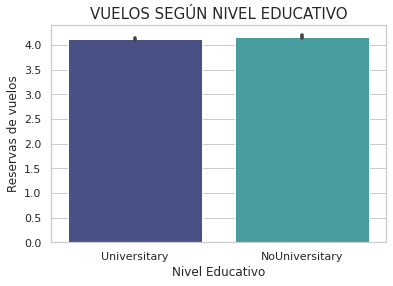

In [193]:
# Antes de hacer la prueba estadística, visualizamos nuestros grupos

sns.barplot(x = 'education_level', y = 'flights_booked',
            data = df_nuevo,
            palette = 'mako')
plt.title('VUELOS SEGÚN NIVEL EDUCATIVO', fontsize=15)
plt.xlabel('Nivel Educativo')
plt.ylabel('Reservas de vuelos');


In [ ]:
'''
Realizamos el Test de Mann Whitney, utilizando la función 'mannwhitneyu' de la biblioteca 'scipy.stats',una vez que nuestros datos no siguen una distribución normal
La utilizaremos para evaluar si hay diferencia significativa entre nuestros dos grupos. En nuestro caso, los grupos serán el grupo test y el control. La columna
"flights_booked" representa la métrica a comparar entre los grupos.
'''

In [146]:
def test_man_whitney(columna_metrica, grupo_control, grupo_test): 

    control = grupo_control
        
    test = grupo_test
    
    # aplicamos el estadístico
    statistic, p_value = stats.mannwhitneyu(control, test)
        
    if p_value < 0.05:
        print(f"Para la métrica {columna_metrica}, las medianas son diferentes.")
    else:
        print(f"Para la métrica {columna_metrica}, las medianas son iguales.")

In [147]:
# llamamos a la función
test_man_whitney("flights_booked", grupo_education_nouniversitary, grupo_education_universitary)

Para la métrica flights_booked, las medianas son diferentes.


### Interpretación del resultado obtenido:

El resultado obtenido nos indica que el p-value es < 0.05 y esto sugiere que hay diferencia significativa entre las medianas de las muestras.
Por lo tanto, en base al resultado, podemos concluir que existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.
